# Advanced Regression Assignment

## Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 
The company is looking at prospective properties to buy to enter the market.

## Business Goal:

Build a regression model using regularisation technique in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

Idenifying the variables which are significant in predicting the price of a house, and how well those variables describe the price of a house.

### STEPS FOLLOWED :

1. Reading & Understanding the data
2. EDA - Preparing Data for Modelling
3. Cleaning the Data
4. Modelling
5. Final Analysis & Recommendation

## Step 1 : Reading & Understanding the Data

In [1]:
#Import required libraries
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline


import statsmodels
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#supress warnings
import warnings
warnings.filterwarnings('ignore')

# Customizing Data display 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
data_df =pd.read_csv("train.csv")
data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Inspecting the dataframe

In [3]:
#let us check the number of rows and columns
data_df.shape
# this data set has 1460 rows and 81 columns

(1460, 81)

In [4]:
#let us check the number of columns in the dataset
data_df.columns
#printing all the 81 columns of the dataset

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Let us see complete information about the dataframe with column details and null values present in the data set.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Out of 81 columns it appears that there are many categorical variables present in the data set.

We can do label encoding and  need to create dummy varibles for these categorical data.

Also, there are null values present in the data, we need to treat them as well. 

We have few valid missing values in the dataset we need to identify them and treat them accordingly.

In [6]:
#check the summary of the dataframe
data_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The count row supposed to have 1460 records for all columns. this indicates "LotFrontage", "MasVnrArea", "GarageYrBlt" these columns have null values.

LotFrontage, LotArea, MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,
WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice these are the columns having outlier data.



 ## Step 2: EDA - Preparing Data for Modelling

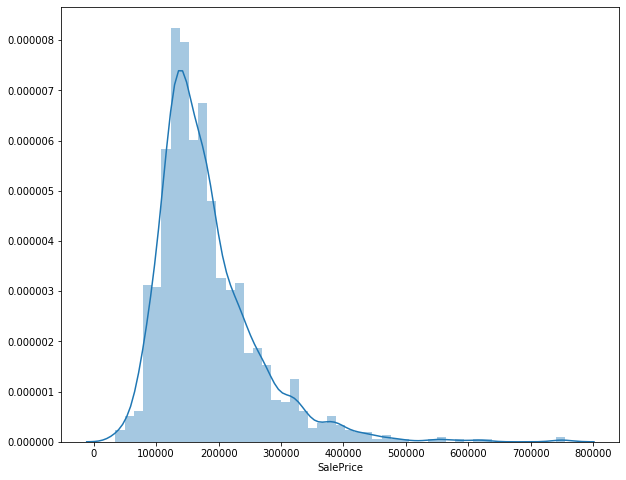

In [7]:
#SalePrice is the target variable in the data set.
plt.figure(figsize=(10,8))
sns.distplot(data_df['SalePrice'])
plt.show()

From the above distplot, the 'SalePrice' distribution is dense between 100000 and 250000, but there are larger outliers on the right side, it is a right skewed ditribution i.e it indicates some houses have really high sale price


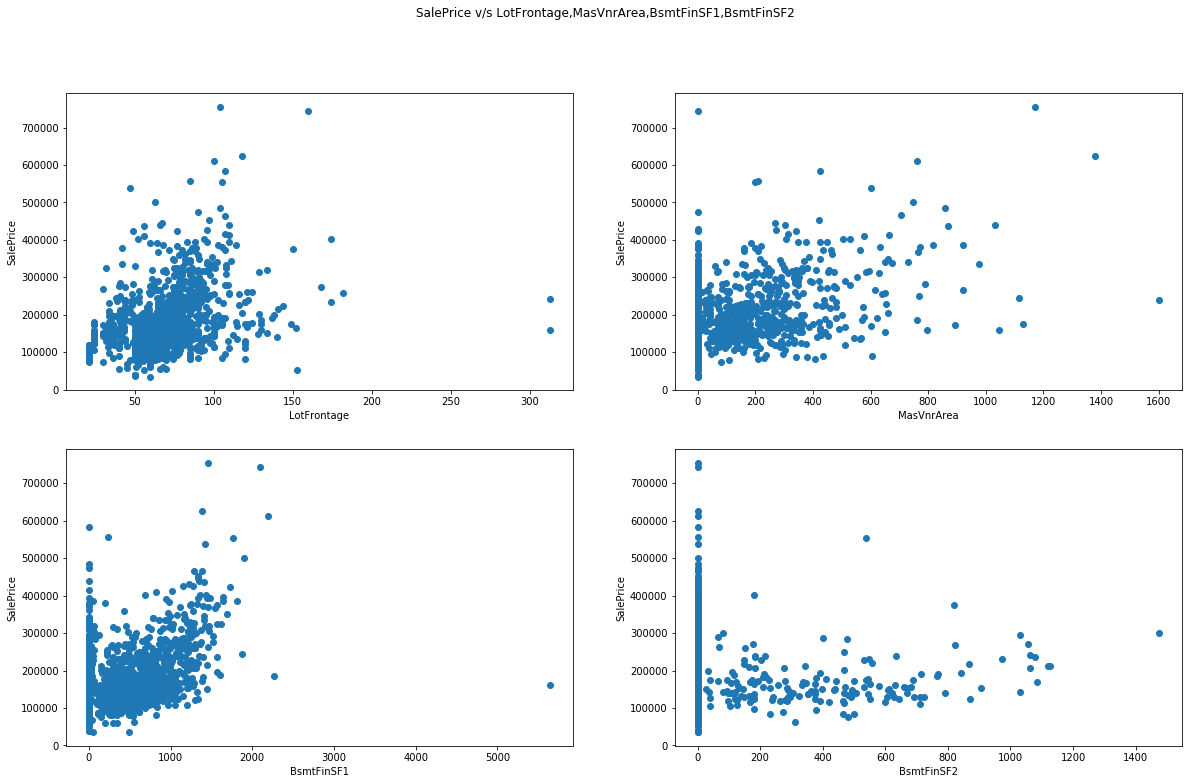

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.scatter(x = 'LotFrontage', y = 'SalePrice', data = data_df)
plt.suptitle('SalePrice v/s LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2')
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.subplot(2,2,2)
plt.scatter(x = 'MasVnrArea', y = 'SalePrice', data = data_df)
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')
plt.subplot(2,2,3)
plt.scatter(x = 'BsmtFinSF1', y = 'SalePrice', data = data_df)
plt.xlabel('BsmtFinSF1')
plt.ylabel('SalePrice')
plt.subplot(2,2,4)
plt.scatter(x = 'BsmtFinSF2', y = 'SalePrice', data = data_df)
plt.xlabel('BsmtFinSF2')
plt.ylabel('SalePrice')
plt.show()

All the variables LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2 have linear relationship with Saleprice variable.
All the variables  LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2 have outlier data.

BsmtFinSF1,BsmtFinSF2 and MasVnrArea for  these variables at zero square feet area we can see the Saleprice.

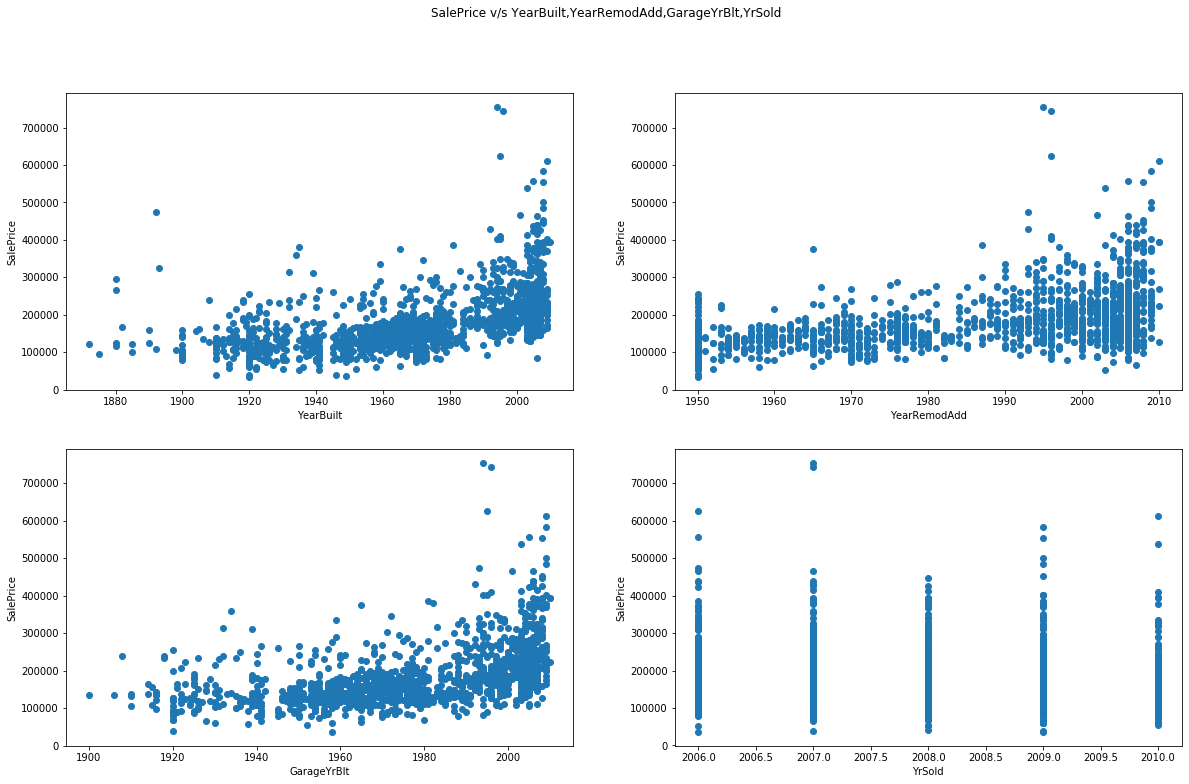

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.scatter(x = 'YearBuilt', y = 'SalePrice', data = data_df)
plt.suptitle('SalePrice v/s YearBuilt,YearRemodAdd,GarageYrBlt,YrSold')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.subplot(2,2,2)
plt.scatter(x = 'YearRemodAdd', y = 'SalePrice', data = data_df)
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')
plt.subplot(2,2,3)
plt.scatter(x = 'GarageYrBlt', y = 'SalePrice', data = data_df)
plt.xlabel('GarageYrBlt')
plt.ylabel('SalePrice')
plt.subplot(2,2,4)
plt.scatter(x = 'YrSold', y = 'SalePrice', data = data_df)
plt.xlabel('YrSold')
plt.ylabel('SalePrice')
plt.show()

The saleprice is high for newly constructed houses.It shows the linear relationship between saleprice and yearbuilt.

For latest remodelled houses and for the houses newly constructed garages the saleprice is high.

The number of houses sold for 5 years of data we can see here.In the year 2008 house sales are less.


Text(0, 0.5, 'SalePrice')

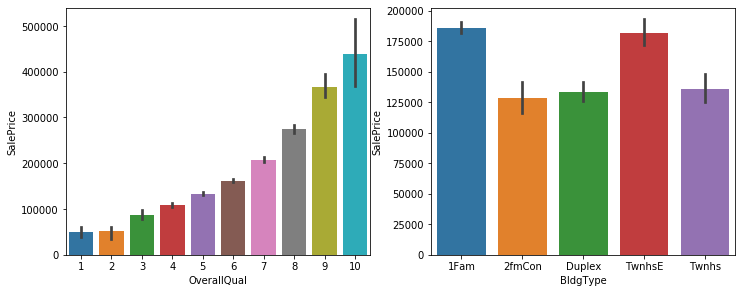

In [10]:
plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)
sns.barplot(x='OverallQual', y='SalePrice', data=data_df)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.subplot(2,2,2)
sns.barplot(x='BldgType', y='SalePrice', data=data_df)
plt.xlabel('BldgType')
plt.ylabel('SalePrice')


Overallqual material and finish of the house is good then the price of the house is high.
It shows a linear relationship between the overallquality and saleprice.

Single-family Detached houses and Townhouse End Unit houses these houses have high sale price.



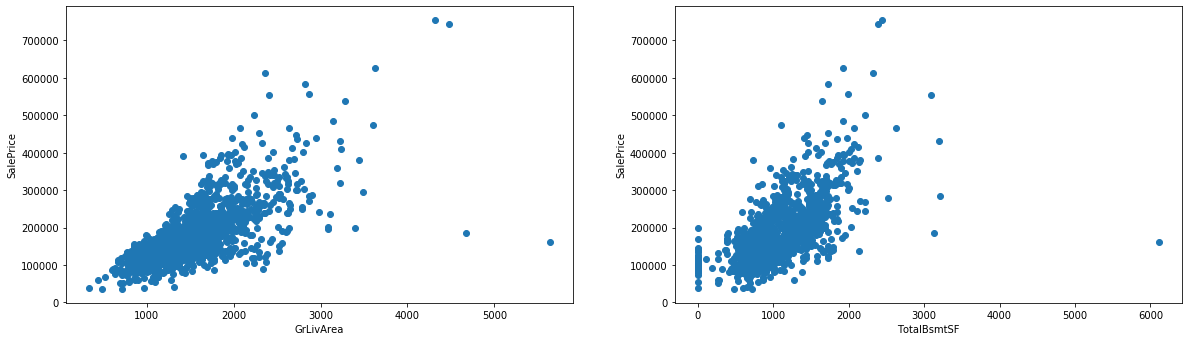

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = data_df)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.subplot(2,2,2)
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = data_df)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

Above ground living area square feet houses shows linear realtionship with saleprice. There are few outliers in the data.

Total square feet of basement area is high the saleprice is high for the houses.

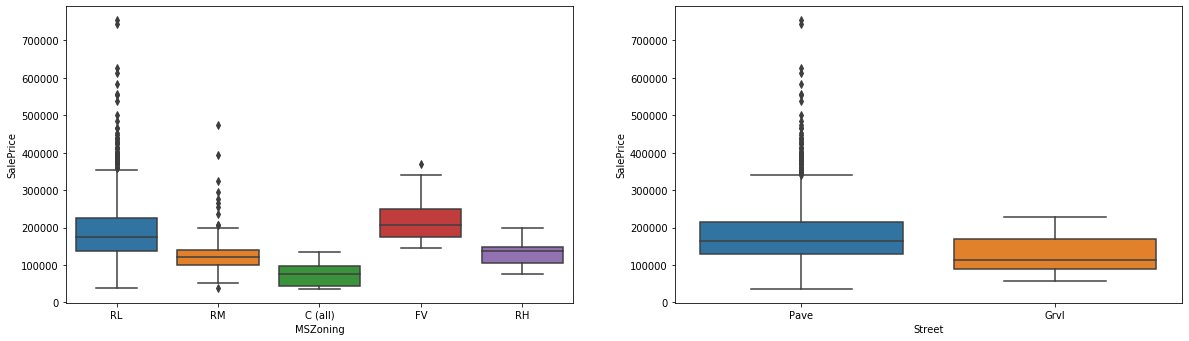

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(y = 'SalePrice', x = 'MSZoning', data = data_df)
plt.xlabel('MSZoning')
plt.ylabel('SalePrice')
plt.subplot(2,2,2)
sns.boxplot(y = 'SalePrice', x = 'Street', data = data_df)
plt.xlabel('Street')
plt.ylabel('SalePrice')
plt.show()

MsZoning identifies the general zoning classification of the saleprice.

We see that the prices vary a lot for different values and most of the records are for "RL" Residential Low Density properties.

Street identifies the Type of road access to property.While we see that houses with Paved roads have higher Sale Price compared to Gravel.

In [13]:
#Identifying the correlation among the variables
res=data_df.corr()

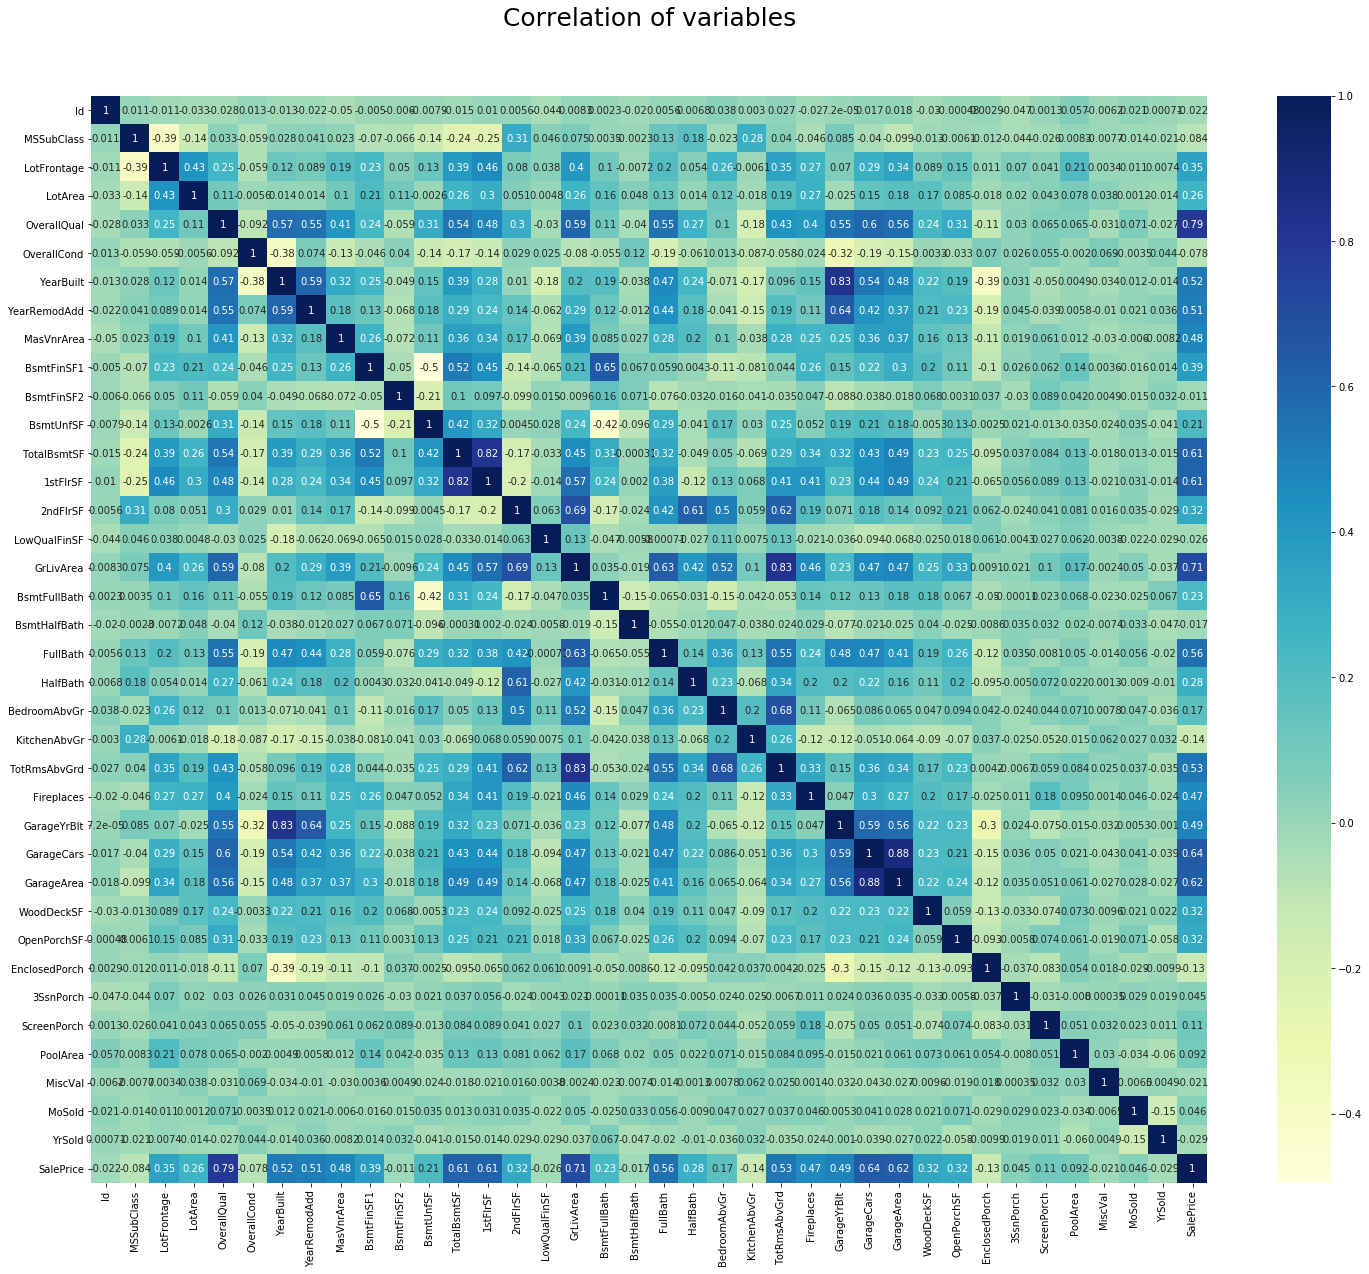

In [14]:
#correlation among variables
plt.figure(figsize=(25, 20))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 70
sns.heatmap(res,annot=True, cmap="YlGnBu")
plt.title("Correlation of variables")
plt.yticks(rotation=0)
plt.show()

'OverallQual', 'GrLivArea' , 'GarageCars' , 'GarageArea', 'FullBath', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd' these independent features are highly correalted with target/dependent feature Saleprice

## Step3: Cleaning the Data

In [15]:
# checking for missing values
data_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [16]:
#checking for percentage of missing values
round(100 * (data_df.isnull().sum())/len(data_df),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [17]:
#dropping Id column 
data_df.drop(columns=['Id'],inplace=True)
data_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
#column 'Alley' has missing data verifying if its meaningful missing value or not.
data_df['Alley'].value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [19]:
#Column 'Alley', NaN values stands for No Alley Access as per the data dictionary this is a meaningful missing value ,
#here we are replacing nan with No Alley
data_df['Alley']=data_df['Alley'].replace(np.nan,'No Alley')
data_df['Alley'].value_counts(dropna=False)


No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

In [20]:
##column 'PoolQC' has missing data verifying if its meaningful missing value or not.
data_df['PoolQC'].value_counts(dropna=False)

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [21]:
#Column 'PoolQC', NaN values stands for No Pool as per the data dictionary this is a meaningful missing value ,
#here we are replacing nan with 'NP'
data_df['PoolQC']=data_df['PoolQC'].replace(np.nan,'NP')
data_df['PoolQC'].value_counts(dropna=False)

NP    1453
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64

In [22]:
##column 'Fence' has missing data verifying if its meaningful missing value or not.
data_df['Fence'].value_counts(dropna=False)


NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [23]:
#Column 'Fence', NaN values stands for 'No Fence' as per the data dictionary this is a meaningful missing value ,
#here we are replacing nan with 'NF'
data_df['Fence']=data_df['Fence'].replace(np.nan,'NF')
data_df['Fence'].value_counts(dropna=False)

NF       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [24]:
#'MiscFeature' (Miscellaneous Features), NaN stands for None , meaning the house has no miscellaneous features.
data_df['MiscFeature'].describe()
#we are dropping MiscFeature variable
data_df.drop(columns=['MiscFeature'],inplace=True)
data_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NP,NF,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NP,NF,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NP,NF,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NP,NF,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NP,NF,0,12,2008,WD,Normal,250000


In [25]:
 #LotFrontage is a continous variable and has  missing data.
data_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [26]:
#LotFrontage is a continous variable ,imputing with median value.
data_df['LotFrontage'].replace(np.NaN, data_df['LotFrontage'].median(), inplace =True)
data_df['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [27]:
#MasVnrArea is a continous variable and has few missing values.
data_df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [28]:
#MasVnrArea is a continous variable and has few missing values.Replacing it with mean value
data_df['MasVnrArea'].replace(np.NaN, data_df['MasVnrArea'].mean(), inplace =True)
data_df['MasVnrArea'].describe()

count    1460.000000
mean      103.685262
std       180.569112
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [29]:
#GarageYrBlt  has few missing values.
data_df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [30]:
#GarageYrBlt this variable depends on Garagetype variable.if there is no garage for the house then it is present as NA. 
#This is a valid  data.Instead of replacing Nan with mean/median .we are replacing it with '0'
data_df['GarageYrBlt'] = data_df['GarageYrBlt'].fillna(0)
data_df['GarageYrBlt'].describe()

count    1460.000000
mean     1868.739726
std       453.697295
min         0.000000
25%      1958.000000
50%      1977.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [31]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#Few more variables having missing values:

MasVnrType,BsmtQual,BsmtCond,BsmtExposure, BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond

In [32]:
#Checking for missing vales for MasVnrType variable
data_df['MasVnrType'].value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [33]:
#MasVnrType we are replacing with mode value 'None'
data_df['MasVnrType']=data_df['MasVnrType'].replace(np.nan,'None')

In [34]:
#Checking for missing vales for BsmtQual variable
data_df['BsmtQual'].value_counts(dropna=False)


TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

For BsmtQual we have 37 records has value NaN it indicates houses doesnt have basement. This is a meaningful missing data. Replacing NaN with 'NB'(No basement)

In [35]:
data_df['BsmtQual']=data_df['BsmtQual'].replace(np.nan,'NB')
data_df['BsmtQual'].value_counts(dropna=False)


TA    649
Gd    618
Ex    121
NB     37
Fa     35
Name: BsmtQual, dtype: int64

In [36]:
#checking for missing values for BsmtCond,BsmtExposure, BsmtFinType1,BsmtFinType2

# for BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType1
print("Checking different category types of data for 'BsmtCond' ")
print(data_df['BsmtCond'].value_counts(dropna=False))
print('\n')
print("Checking different category types of data data for 'BsmtExposure'")
print(data_df['BsmtExposure'].value_counts(dropna=False))
print('\n')
print("Checking different category types of data data for 'BsmtFinType1'")
print(data_df['BsmtFinType1'].value_counts(dropna=False))
print('\n')
print("Checking different category types of data data for 'BsmtFinType2'")
print(data_df['BsmtFinType2'].value_counts(dropna=False))


Checking different category types of data for 'BsmtCond' 
TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64


Checking different category types of data data for 'BsmtExposure'
No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64


Checking different category types of data data for 'BsmtFinType1'
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64


Checking different category types of data data for 'BsmtFinType2'
Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [37]:
#BsmtCond,BsmtExposure, BsmtFinType1,BsmtFinType2 for these variables nan indicates 'No Basement' we are replacing it with 'NB' value

data_df['BsmtCond']=data_df['BsmtCond'].replace(np.nan,'NB')
data_df['BsmtExposure']=data_df['BsmtExposure'].replace(np.nan,'NB')
data_df['BsmtFinType1']=data_df['BsmtFinType1'].replace(np.nan,'NB')
data_df['BsmtFinType2']=data_df['BsmtFinType2'].replace(np.nan,'NB')

In [38]:
# checking for missing values for GarageType,GarageFinish, GarageQual,GarageCond
print("Checking different category types of data for 'GarageType' ")
print(data_df['GarageType'].value_counts(dropna=False))
print('\n')
print("Checking different category types of data for 'GarageFinish'")
print(data_df['GarageFinish'].value_counts(dropna=False))
print('\n')
print("Checking different category types of data for 'GarageQual'")
print(data_df['GarageQual'].value_counts(dropna=False))
print('\n')
print("Checking different category types of data for 'GarageCond' ")
print(data_df['GarageCond'].value_counts(dropna=False))


Checking different category types of data for 'GarageType' 
Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


Checking different category types of data for 'GarageFinish'
Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64


Checking different category types of data for 'GarageQual'
TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64


Checking different category types of data for 'GarageCond' 
TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64


In [39]:
# GarageType,GarageFinish, GarageQual,GarageCond has valid missing data.
#Here nan indicates that house doesnt have garage.
# we are repalcing nan with 'NG'
data_df['GarageType']=data_df['GarageType'].replace(np.nan,'NG')
data_df['GarageFinish']=data_df['GarageFinish'].replace(np.nan,'NG')
data_df['GarageQual']=data_df['GarageQual'].replace(np.nan,'NG')
data_df['GarageCond']=data_df['GarageCond'].replace(np.nan,'NG')

In [40]:
## checking for missing values for FireplaceQu

print("Checking different category types of data for 'FireplaceQu'")
print(data_df['FireplaceQu'].value_counts(dropna=False))

Checking different category types of data for 'FireplaceQu'
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64


In [41]:
#FireplaceQu nan value indicates house doesnt have Fireplace. 
# here we are replacing nan with 'NF'
data_df['FireplaceQu']=data_df['FireplaceQu'].replace(np.nan,'NF')
print(data_df['FireplaceQu'].value_counts(dropna=False))

NF    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


In [42]:
## checking for missing values for Electrical
print(data_df['Electrical'].value_counts(dropna=False))

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64


In [43]:
#For Electricalvariable we have only one missing value replacing it with mode value 'SBrkr'
data_df['Electrical']=data_df['Electrical'].replace(np.nan,'SBrkr')
print(data_df['Electrical'].value_counts(dropna=False))


SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [44]:
#After all the data imputation verifying for missing vales.
data_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

#There are no null values in the dataset now.All the missing value are imputed accordingly.

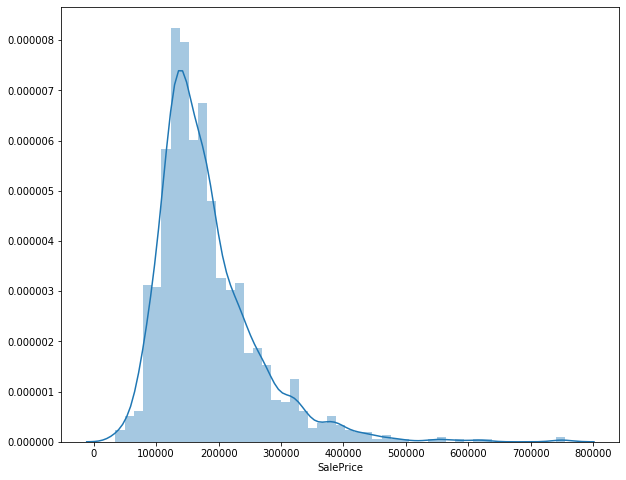

In [45]:
#Checking if target variable is normally distributed or not
#SalePrice is the target variable.
plt.figure(figsize=(10,8))
sns.distplot(data_df['SalePrice'])
plt.show()

In [46]:
#there are larger outliers on the right side, it is a right skewed ditribution 
#Performing log1p transformation on target variable
data_df['SalePrice']=np.log1p(data_df.SalePrice)

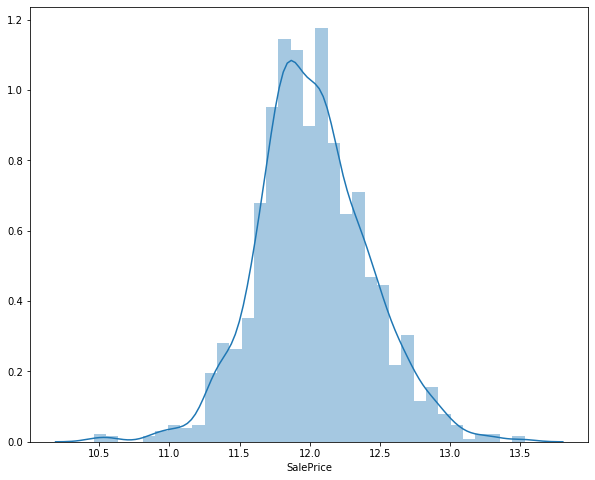

In [47]:
plt.figure(figsize=(10,8))
sns.distplot(data_df['SalePrice'])
plt.show()

In [48]:
#Variables having categorical data
print(data_df[list(data_df.dtypes[data_df.dtypes=='object'].index)].head())


  MSZoning Street     Alley LotShape LandContour Utilities LotConfig  \
0       RL   Pave  No Alley      Reg         Lvl    AllPub    Inside   
1       RL   Pave  No Alley      Reg         Lvl    AllPub       FR2   
2       RL   Pave  No Alley      IR1         Lvl    AllPub    Inside   
3       RL   Pave  No Alley      IR1         Lvl    AllPub    Corner   
4       RL   Pave  No Alley      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation  \
0  Com

In [49]:
#label encode ordinal features where there is order in categories.

data_df['LandSlope']=data_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})

data_df['ExterQual'] = data_df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

data_df['ExterCond'] = data_df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

data_df['BsmtQual'] = data_df.BsmtQual.map({'NB':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

data_df['BsmtCond'] = data_df.BsmtCond.map({'NB':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

data_df['BsmtFinType1'] = data_df.BsmtFinType1.map({'NB':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})

data_df['BsmtFinType2'] = data_df.BsmtFinType2.map({'NB':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})

data_df['BsmtExposure'] = data_df.BsmtExposure.map({'NB':0,'No':1,'Mn':2,'Av':3,'Gd':4})

data_df['HeatingQC'] = data_df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

data_df['CentralAir'] = data_df.CentralAir.map({'N':0,'Y':1})

data_df['KitchenQual'] = data_df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

data_df['FireplaceQu'] = data_df.FireplaceQu.map({'NF':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

data_df['GarageFinish'] = data_df.GarageFinish.map({'NG':0,'Unf':1,'RFn':2,'Fin':3})

data_df['GarageQual'] = data_df.GarageQual.map({'NG':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

data_df['GarageCond'] = data_df.GarageCond.map({'NG':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

data_df['PoolQC'] = data_df.PoolQC.map({'NP':0, 'Fa':1,'TA':2,'Gd':3,'Ex':4})

data_df['Fence'] = data_df.Fence.map({'NF':0, 'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})

data_df['LotShape'] = data_df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [50]:
data_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No Alley,3,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,GasA,4,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,3,8,Typ,0,0,Attchd,2003.0,2,2,548,3,3,Y,0,61,0,0,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,No Alley,3,Lvl,AllPub,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978,1,0,284,1262,GasA,4,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,2,6,Typ,1,3,Attchd,1976.0,2,2,460,3,3,Y,298,0,0,0,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,No Alley,0,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486,1,0,434,920,GasA,4,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,3,6,Typ,1,3,Attchd,2001.0,2,2,608,3,3,Y,0,42,0,0,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,No Alley,0,Lvl,AllPub,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216,1,0,540,756,GasA,3,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,3,7,Typ,1,4,Detchd,1998.0,1,3,642,3,3,Y,0,35,272,0,0,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,No Alley,0,Lvl,AllPub,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655,1,0,490,1145,GasA,4,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,3,9,Typ,1,3,Attchd,2000.0,2,3,836,3,3,Y,192,84,0,0,0,0,0,0,0,12,2008,WD,Normal,12.429220
5,50,RL,85.0,14115,Pave,No Alley,0,Lvl,AllPub,Inside,0,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,Wood,4,3,1,6,732,1,0,64,796,GasA,4,1,SBrkr,796,566,0,1362,1,0,1,1,1,1,2,5,Typ,0,0,Attchd,1993.0,1,2,480,3,3,Y,40,30,0,320,0,0,0,3,700,10,2009,WD,Normal,11.870607
6,20,RL,75.0,10084,Pave,No Alley,3,Lvl,AllPub,Inside,0,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,3,2,PConc,5,3,3,6,1369,1,0,317,1686,GasA,4,1,SBrkr,1694,0,0,1694,1,0,2,0,3,1,3,7,Typ,1,4,Attchd,2004.0,2,2,636,3,3,Y,255,57,0,0,0,0,0,0,0,8,2007,WD,Normal,12.634606
7,60,RL,69.0,10382,Pave,No Alley,0,Lvl,AllPub,Corner,0,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,2,2,CBlock,4,3,2,5,859,4,32,216,1107,GasA,4,1,SBrkr,1107,983,0,2090,1,0,2,1,3,1,2,7,Typ,2,3,Attchd,1973.0,2,2,484,3,3,Y,235,204,228,0,0,0,0,0,350,11,2009,WD,Normal,12.206078
8,50,RM,51.0,6120,Pave,No Alley,3,Lvl,AllPub,Inside,0,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,2,2,BrkTil,3,3,1,1,0,1,0,952,952,GasA,3,1,FuseF,1022,752,0,1774,0,0,2,0,2,2,2,8,Min1,2,3,Detchd,1931.0,1,2,468,2,3,Y,90,0,205,0,0,0,0,0,0,4,2008,WD,Abnorml,11.774528
9,190,RL,50.0,7420,Pave,No Alley,3,Lvl,AllPub,Corner,0,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,BrkTil,3,3,1,6,851,1,0,140,991,GasA,4,1,SBrkr,1077,0,0,1077,1,0,1,0,2,2,2,5,Typ,2,3,Attchd,1939.0,2,1,205,4,3,Y,0,4,0,0,0,0,0,0,0,1,2008,WD,Normal,11.678448


In [51]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#Need to create dummies for these variables:

MSZoning, Street, Alley ,LandContour,Utilities ,LotConfig  ,Neighborhood,Condition1 ,Condition2 ,BldgType  ,HouseStyle  ,
RoofStyle   ,RoofMatl  ,Exterior1st ,Exterior2nd ,MasVnrType,Foundation ,Heating,Electrical ,Functional  ,GarageType     
PavedDrive  ,SaleType   ,SaleCondition  

In [52]:
#Identifying variables having more category types and clubbing them in to a single category.
round(data_df['Neighborhood'].value_counts(normalize=True)*100,2)

NAmes      15.41
CollgCr    10.27
OldTown     7.74
Edwards     6.85
Somerst     5.89
Gilbert     5.41
NridgHt     5.27
Sawyer      5.07
NWAmes      5.00
SawyerW     4.04
BrkSide     3.97
Crawfor     3.49
Mitchel     3.36
NoRidge     2.81
Timber      2.60
IDOTRR      2.53
ClearCr     1.92
StoneBr     1.71
SWISU       1.71
MeadowV     1.16
Blmngtn     1.16
BrDale      1.10
Veenker     0.75
NPkVill     0.62
Blueste     0.14
Name: Neighborhood, dtype: float64

In [53]:
# combining low frequency entries under a common category & checking the same
#less than 2% of data we are creating them as a seperate category 'Others'
data_df['Neighborhood'] = data_df['Neighborhood'].replace(['Veenker', 'NPkVill', 'Blueste'],'Others')
print('POST CONVERSION :')
data_df['Neighborhood'].value_counts(dropna=False,normalize=True)*100

POST CONVERSION :


NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
StoneBr     1.712329
SWISU       1.712329
Others      1.506849
Blmngtn     1.164384
MeadowV     1.164384
BrDale      1.095890
Name: Neighborhood, dtype: float64

In [54]:
round(data_df['HouseStyle'].value_counts(normalize=True)*100,2)

1Story    49.73
2Story    30.48
1.5Fin    10.55
SLvl       4.45
SFoyer     2.53
1.5Unf     0.96
2.5Unf     0.75
2.5Fin     0.55
Name: HouseStyle, dtype: float64

In [55]:
# combining low frequency entries under a common category & checking the same
data_df['HouseStyle'] = data_df['HouseStyle'].replace(['1.5Unf', '2.5Unf', '2.5Fin'],'Others')
print('POST CONVERSION :')
data_df['HouseStyle'].value_counts(dropna=False,normalize=True)*100

POST CONVERSION :


1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
SLvl       4.452055
SFoyer     2.534247
Others     2.260274
Name: HouseStyle, dtype: float64

In [56]:
#less than 2% of data we are creating them as a seperate category 'Others'
round(data_df['RoofStyle'].value_counts(normalize=True)*100,2)

Gable      78.15
Hip        19.59
Flat        0.89
Gambrel     0.75
Mansard     0.48
Shed        0.14
Name: RoofStyle, dtype: float64

In [57]:
# combining low frequency entries under a common category & checking the same
data_df['RoofStyle'] = data_df['RoofStyle'].replace(['Flat', 'Gambrel', 'Mansard','Shed'],'Others')
print('POST CONVERSION :')
data_df['RoofStyle'].value_counts(dropna=False,normalize=True)*100

POST CONVERSION :


Gable     78.150685
Hip       19.589041
Others     2.260274
Name: RoofStyle, dtype: float64

In [58]:
#less than 1% of data we are creating them as a seperate category 'Others'
round(data_df['Exterior1st'].value_counts(normalize=True)*100,2)

VinylSd    35.27
HdBoard    15.21
MetalSd    15.07
Wd Sdng    14.11
Plywood     7.40
CemntBd     4.18
BrkFace     3.42
WdShing     1.78
Stucco      1.71
AsbShng     1.37
Stone       0.14
BrkComm     0.14
ImStucc     0.07
CBlock      0.07
AsphShn     0.07
Name: Exterior1st, dtype: float64

In [59]:
# combining low frequency entries under a common category & checking the same
data_df['Exterior1st'] = data_df['Exterior1st'].replace(['Stone', 'BrkComm', 'AsphShn','ImStucc','CBlock'],'Others')
print('POST CONVERSION :')
data_df['Exterior1st'].value_counts(dropna=False,normalize=True)*100

POST CONVERSION :


VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
CemntBd     4.178082
BrkFace     3.424658
WdShing     1.780822
Stucco      1.712329
AsbShng     1.369863
Others      0.479452
Name: Exterior1st, dtype: float64

In [60]:
#Identifying less than 1% of data we are creating them as a seperate category 'Others'
round(data_df['Exterior2nd'].value_counts(normalize=True)*100,2)

VinylSd    34.52
MetalSd    14.66
HdBoard    14.18
Wd Sdng    13.49
Plywood     9.73
CmentBd     4.11
Wd Shng     2.60
Stucco      1.78
BrkFace     1.71
AsbShng     1.37
ImStucc     0.68
Brk Cmn     0.48
Stone       0.34
AsphShn     0.21
CBlock      0.07
Other       0.07
Name: Exterior2nd, dtype: float64

In [61]:
# combining low frequency entries under a common category & checking the same
data_df['Exterior2nd'] = data_df['Exterior2nd'].replace(['ImStucc','Brk Cmn', 'Stone','AsphShn','Other','CBlock'],'Others')
print('POST CONVERSION :')
data_df['Exterior2nd'].value_counts(dropna=False,normalize=True)*100

POST CONVERSION :


VinylSd    34.520548
MetalSd    14.657534
HdBoard    14.178082
Wd Sdng    13.493151
Plywood     9.726027
CmentBd     4.109589
Wd Shng     2.602740
Others      1.849315
Stucco      1.780822
BrkFace     1.712329
AsbShng     1.369863
Name: Exterior2nd, dtype: float64

In [62]:
#Indentifying less than 1% of other category data and clubbing them in to a single category
round(data_df['GarageType'].value_counts(normalize=True)*100,2)

Attchd     59.59
Detchd     26.51
BuiltIn     6.03
NG          5.55
Basment     1.30
CarPort     0.62
2Types      0.41
Name: GarageType, dtype: float64

In [63]:
# combining low frequency entries under a common category & checking the same
data_df['GarageType'] = data_df['GarageType'].replace(['CarPort', '2Types'],'Others')
print('POST CONVERSION :')
data_df['GarageType'].value_counts(dropna=False,normalize=True)*100

POST CONVERSION :


Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
NG          5.547945
Basment     1.301370
Others      1.027397
Name: GarageType, dtype: float64

#Few categorical variables has 80% of data represented by 1 type.Checking all the variables of such kind.

In [64]:
print(round(data_df['Street'].value_counts(normalize=True)*100,2))
print("\n")

print(round(data_df['Alley'].value_counts(normalize=True)*100,2))
print("\n")

print(round(data_df['LandContour'].value_counts(normalize=True)*100,2))
print("\n")

print(round(data_df['Utilities'].value_counts(normalize=True)*100,2))
print("\n")

print(round(data_df['Condition1'].value_counts(normalize=True)*100,2))
print("\n")

print(round(data_df['Condition2'].value_counts(normalize=True)*100,2))
print("\n")

print(round(data_df['BldgType'].value_counts(normalize=True)*100,2))
print("\n")

print(round(data_df['RoofMatl'].value_counts(normalize=True)*100,2))
print("\n")

print(round(data_df['Heating'].value_counts(normalize=True)*100,2))
print("\n")

print(round(data_df['Electrical'].value_counts(normalize=True)*100,2))
print("\n")

print(round(data_df['Functional'].value_counts(normalize=True)*100,2))
print("\n")

print(round(data_df['PavedDrive'].value_counts(normalize=True)*100,2))
print("\n")

print(round(data_df['SaleType'].value_counts(normalize=True)*100,2))
print("\n")

print(round(data_df['SaleCondition'].value_counts(normalize=True)*100,2))

Pave    99.59
Grvl     0.41
Name: Street, dtype: float64


No Alley    93.77
Grvl         3.42
Pave         2.81
Name: Alley, dtype: float64


Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name: LandContour, dtype: float64


AllPub    99.93
NoSeWa     0.07
Name: Utilities, dtype: float64


Norm      86.30
Feedr      5.55
Artery     3.29
RRAn       1.78
PosN       1.30
RRAe       0.75
PosA       0.55
RRNn       0.34
RRNe       0.14
Name: Condition1, dtype: float64


Norm      98.97
Feedr      0.41
Artery     0.14
RRNn       0.14
PosN       0.14
RRAe       0.07
PosA       0.07
RRAn       0.07
Name: Condition2, dtype: float64


1Fam      83.56
TwnhsE     7.81
Duplex     3.56
Twnhs      2.95
2fmCon     2.12
Name: BldgType, dtype: float64


CompShg    98.22
Tar&Grv     0.75
WdShngl     0.41
WdShake     0.34
Roll        0.07
Membran     0.07
ClyTile     0.07
Metal       0.07
Name: RoofMatl, dtype: float64


GasA     97.81
GasW      1.23
Grav      0.48
Wall      0.27
OthW      0.14
Floo

80% of the data is represented by 1 type of category for the variables. There is no point in combining the rest values into Others.
We could consider dropping this features.

In [65]:
drop_col=['Street','Alley','LandContour','Utilities','Condition1','Condition2','BldgType','RoofMatl','Heating','Electrical',
         'Functional','PavedDrive','SaleType','SaleCondition']


In [66]:
data_df.drop(drop_col,axis=1,inplace=True)
data_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,3,Inside,0,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,0,Attchd,2003.0,2,2,548,3,3,0,61,0,0,0,0,0,0,0,2,2008,12.247699
1,20,RL,80.0,9600,3,FR2,0,Others,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978,1,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,3,Attchd,1976.0,2,2,460,3,3,298,0,0,0,0,0,0,0,0,5,2007,12.109016
2,60,RL,68.0,11250,0,Inside,0,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486,1,0,434,920,4,1,920,866,0,1786,1,0,2,1,3,1,3,6,1,3,Attchd,2001.0,2,2,608,3,3,0,42,0,0,0,0,0,0,0,9,2008,12.317171
3,70,RL,60.0,9550,0,Corner,0,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216,1,0,540,756,3,1,961,756,0,1717,1,0,1,0,3,1,3,7,1,4,Detchd,1998.0,1,3,642,3,3,0,35,272,0,0,0,0,0,0,2,2006,11.849405
4,60,RL,84.0,14260,0,FR2,0,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655,1,0,490,1145,4,1,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,3,Attchd,2000.0,2,3,836,3,3,192,84,0,0,0,0,0,0,0,12,2008,12.429220


In [67]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   int64  
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   int64  
 7   Neighborhood   1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

In [68]:
#creating dummies for all the categorical variables.
dummy_columns = pd.get_dummies(data_df[['MSZoning','LotConfig','Neighborhood',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'GarageType']],
                           drop_first=True)

data_df = pd.concat([data_df,dummy_columns],axis='columns')

#we are removing the duplicates columns 
data_df = data_df.drop(['MSZoning','LotConfig','Neighborhood',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'GarageType'],axis='columns')


In [69]:
#YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
#identifying no of years.
import datetime
now = datetime.datetime.now()
curr_year=now.year
data_df['YearBuilt'] = curr_year - data_df['YearBuilt']

#For saleprice analysis we need YearBuilt,so dropping YearRemodAdd,GarageYrBlt,YrSold
data_df.drop(['YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

### Splitting the data into training and testing tests##

In [70]:
data_df.shape

(1460, 122)

In [71]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data_df, train_size = 0.7, random_state = 100)

In [72]:
print(df_train.shape)
print(df_test.shape)

(1021, 122)
(439, 122)


In [73]:
#### Dividing into X and y sets for model building ####
y_train=df_train.pop('SalePrice')
X_train=df_train

y_test=df_test.pop("SalePrice")
X_test=df_test

In [74]:
### Rescaling the features using StandardScaler Scaling###
scaler=StandardScaler()


In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 318 to 792
Columns: 121 entries, MSSubClass to GarageType_Others
dtypes: float64(2), int64(49), uint8(70)
memory usage: 484.6 KB


In [76]:
#List of variables whose datatype is 'int64' and 'float64'. Performing scaling on this variables
num_vars=df_train.select_dtypes(include=['int64','float64']).columns
num_vars

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscVal', 'MoSold'],
      dtype='object')

In [77]:
#performing fit tranformation on the train data set
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [78]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Others,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_NG,GarageType_Others
318,0.035305,0.925326,-0.057261,0.74876,3.305904,0.648310,-0.532073,-0.715324,0.807462,1.051361,-0.260816,0.577925,0.123940,2.143653,1.138412,1.159065,-0.278494,-0.293313,-0.454262,0.621091,0.871757,0.277496,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.320660,1.646935,0.867501,0.268059,0.270467,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.058046,-0.453774,-0.084263,-0.833178,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
239,-0.195760,-0.795709,-0.169753,0.74876,-0.228471,-0.066511,-1.448170,0.868511,-0.560537,-0.699764,-0.260816,-0.533302,-1.609519,-0.607084,-0.753845,-0.761831,-0.278494,-0.293313,0.172244,-0.712611,-1.181447,0.277496,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,-0.792924,-1.034916,-1.188045,0.268059,0.270467,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.058046,2.091847,-0.084263,-0.833178,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
986,-0.195760,-0.478677,-0.502762,0.74876,-0.228471,-0.066511,2.216221,2.023391,-0.560537,-0.699764,2.602556,-0.533302,-1.609519,-0.607084,-1.226909,-0.964030,-0.278494,-0.293313,-0.175567,-1.257424,-0.154845,0.277496,-0.421449,0.667284,-0.124502,0.219811,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,0.741868,-0.937484,-0.927153,-0.985354,-0.792924,-1.034916,-1.023035,-1.121220,0.270467,2.422143,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.058046,-0.453774,-0.084263,-0.105172,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1416,3.039142,-0.433386,0.082504,0.74876,-0.228471,-1.496155,0.384025,2.848305,-0.560537,-0.699764,-0.260816,-0.533302,0.123940,-0.607084,-1.226909,-0.964030,-0.278494,-0.293313,0.475464,-0.621082,-0.154845,0.277496,0.194590,1.609195,-0.124502,1.4

In [79]:
#performing transform on the test daa set
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Others,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_NG,GarageType_Others
1436,-0.888953,-0.433386,-0.144614,0.748760,-0.228471,-1.496155,0.384025,0.010600,-0.560537,-0.699764,-0.260816,-0.533302,0.123940,-0.607084,0.665348,0.361022,-0.278494,-0.293313,-0.703973,-0.431488,-1.181447,0.277496,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,-0.792924,0.306009,0.264038,0.268059,0.270467,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.058046,1.243307,-0.084263,-0.469175,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
57,0.035305,0.880036,0.112107,-1.388661,-0.228471,0.648310,-0.532073,-1.078286,-0.560537,1.051361,-0.260816,0.577925,0.123940,-0.607084,-1.226909,-0.964030,-0.278494,-0.293313,0.660517,-0.440205,0.871757,0.277496,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.320660,0.306009,0.438477,0.268059,0.270467,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.058046,-0.453774,-0.084263,0.622834,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
780,-0.888953,-0.297515,-0.253806,0.748760,-0.228471,0.648310,-0.532073,-0.781317,-0.357475,-0.699764,-0.260816,0.577925,1.857399,-0.607084,-1.226909,-0.964030,-0.278494,-0.293313,1.501060,0.381373,-0.154845,0.277496,0.212191,-0.789230,-0.124502,-0.498789,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,1.434243,0.306009,-0.329996,0.268059,0.270467,1.023633,-0.393502,-0.368121,-0.121922,-0.275126,-0.062302,-0.058046,-0.453774,-0.084263,-0.105172,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
382,0.035305,0.427132,-0.120835,-1.388661,-0.228471,0.648310,-0.532073,-1.144279,-0.560537,1.051361,-0.260816,0.577925,0.123940,1.226741,-1.226909,-0.964030,-0.278494,-0.293313,0.836652,-0.268044,0.871757,0.277496,-0.577345,1.181889,-0.1245

## Step 4:Modelling

**Building our model using RFE**

In [80]:
#Running RFE with output 25 variables 
lm=LinearRegression()
lm=lm.fit(X_train,y_train)
rfe=RFE(lm,30)
rfe=rfe.fit(X_train,y_train)

In [81]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 48),
 ('LotArea', False, 10),
 ('LotShape', False, 90),
 ('LandSlope', False, 77),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('MasVnrArea', False, 50),
 ('ExterQual', False, 80),
 ('ExterCond', False, 76),
 ('BsmtQual', False, 59),
 ('BsmtCond', False, 92),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 6),
 ('BsmtFinSF1', False, 17),
 ('BsmtFinType2', False, 74),
 ('BsmtFinSF2', False, 22),
 ('BsmtUnfSF', False, 21),
 ('TotalBsmtSF', False, 16),
 ('HeatingQC', False, 51),
 ('CentralAir', False, 62),
 ('1stFlrSF', False, 18),
 ('2ndFlrSF', False, 15),
 ('LowQualFinSF', False, 19),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 49),
 ('FullBath', False, 11),
 ('HalfBath', False, 12),
 ('BedroomAbvGr', False, 70),
 ('KitchenAbvGr', False, 38),
 ('KitchenQual', False, 9),
 ('TotRmsAbvGrd', False, 42),
 ('Fireplaces', False, 86),
 ('FireplaceQu', True, 1),
 ('GarageF

In [82]:
# Col it contains 25 variables which we are considering as part of building the model
col = X_train.columns[rfe.support_]
col


Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtExposure',
       'GrLivArea', 'BsmtFullBath', 'FireplaceQu', 'GarageCars', 'GarageQual',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Others', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Exterior1st_Others', 'Exterior2nd_BrkFace', 'Foundation_PConc',
       'Foundation_Stone', 'Foundation_Wood', 'GarageType_BuiltIn',
       'GarageType_NG'],
      dtype='object')

In [83]:
#Creating X_train dataframe with RFE selected variables.
X_train_new = X_train[col]
#adding constant variable
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train_new)

lm=sm.OLS(y_train,X_train_new).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     265.7
Date:                Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:05:33   Log-Likelihood:                 620.57
No. Observations:                1021   AIC:                            -1179.
Df Residuals:                     990   BIC:                            -1026.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.5656 

In [84]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)


In [85]:
#Lets filter the train and test set for the RFE selected columns¶

X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

### Ridge and Lasso Regression

### Ridge Regression

In [86]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [87]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002194,7.468763e-04,0.001197,3.996148e-04,0.0001,{'alpha': 0.0001},-0.094165,-0.090750,-0.099688,-0.091962,-0.092606,-0.093834,0.003128,23,-0.090520,-0.088555,-0.087689,-0.091055,-0.091699,-0.089904,0.001527
1,0.001994,8.609519e-07,0.000997,4.422006e-07,0.001,{'alpha': 0.001},-0.094164,-0.090749,-0.099689,-0.091953,-0.092605,-0.093832,0.003129,22,-0.090519,-0.088555,-0.087689,-0.091056,-0.091699,-0.089903,0.001527
2,0.002393,4.979683e-04,0.000998,1.302298e-05,0.01,{'alpha': 0.01},-0.094150,-0.090744,-0.099695,-0.091869,-0.092601,-0.093812,0.003143,21,-0.090513,-0.088552,-0.087684,-0.091060,-0.091696,-0.089901,0.001528
3,0.001798,4.002141e-04,0.000599,4.890064e-04,0.05,{'alpha': 0.05},-0.094092,-0.090723,-0.099723,-0.091510,-0.092581,-0.093726,0.003204,20,-0.090488,-0.088539,-0.087666,-0.091080,-0.091683,-0.089891,0.001534
4,0.001597,4.896110e-04,0.001000,5.479272e-06,0.1,{'alpha': 0.1},-0.094024,-0.090698,-0.099751,-0.091099,-0.092559,-0.093626,0.003279,18,-0.090461,-0.088524,-0.087646,-0.091103,-0.091668,-0.089880,0.001540


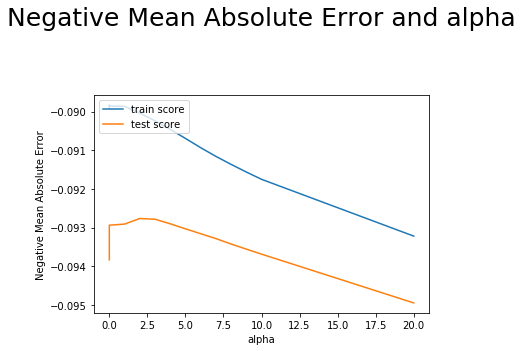

In [88]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')

plt.show()

In [89]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 2.0}
-0.09276525180361345


In [90]:
#final ridge model
#From the graph we considered alpha value as 2
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.0364711 ,  0.08798028,  0.0617629 , -0.08637071,  0.03247388,
        0.13838887,  0.0382077 ,  0.03615284,  0.04774647,  0.02426399,
        0.16278846,  0.18836716,  0.20951968,  0.1238    ,  0.1222337 ,
        0.15308477, -0.08057176, -0.06958733,  0.09594075,  0.14369651,
        0.03960124,  0.12360169,  0.11496212, -0.07945823,  0.11101937,
        0.04987365,  0.0595639 ,  0.02900458, -0.03676771,  0.10573899])

In [91]:
#lets predict the R-squared value of test and train data
from sklearn import metrics
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8872881085177853


In [92]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.876205390597585


In [93]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.020402908067602265


In [94]:
model_parameters_1 = list(ridge.coef_)
model_parameters_1.insert(0, ridge.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_1))


ridge_coef = pd.DataFrame(list(zip(cols,model_parameters_1)))
ridge_coef.columns = ['Feature','Coef']

In [95]:
ridge_coef

,Feature,Coef
0,constant,11.781
1,MSSubClass,-0.036
2,OverallQual,0.088
3,OverallCond,0.062
4,YearBuilt,-0.086
5,BsmtExposure,0.032
6,GrLivArea,0.138
7,BsmtFullBath,0.038
8,FireplaceQu,0.036
9,GarageCars,0.048


In [96]:
print("Most important 30 features that are affecting Sales pricing are:")

ridge_coef.sort_values(by='Coef',ascending=False).head(35)


Most important 30 features that are affecting Sales pricing are:


,Feature,Coef
0,constant,11.781
13,MSZoning_RL,0.210
12,MSZoning_RH,0.188
11,MSZoning_FV,0.163
16,Neighborhood_Crawfor,0.153
20,Neighborhood_NridgHt,0.144
6,GrLivArea,0.138
22,Neighborhood_Somerst,0.124
14,MSZoning_RM,0.124
15,Neighborhood_ClearCr,0.122


As per Ridge regression these are the variables significant in predicting the price of the house:

'MSZoning_RL','Neighborhood_ClearCr','MSZoning_RH','Neighborhood_Crawfor','GrLivArea','Neighborhood_NridgHt','Neighborhood_Somerst','Exterior2nd_BrkFace','OverallQual',
'YearBuilt','MSZoning_FV','Neighborhood_NoRidge','Neighborhood_Edwards','Neighborhood_StoneBr','Exterior1st_Others','OverallCond','MSZoning_RM','GarageCars',BsmtFullBath',
'GarageType_BuiltIn','Foundation_PConc','FireplaceQu','Foundation_Stone', 'Foundation_Wood, 'GarageType_NG','Neighborhood_Others', 'Neighborhood_MeadowV', 'MSSubClass',
GarageQual','BsmtExposure'

In [97]:
#we doubled alpha value for ridge regression
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.03569875,  0.09088379,  0.06213331, -0.0864211 ,  0.03200888,
        0.13784306,  0.03872604,  0.03692435,  0.04789329,  0.01805834,
        0.10756607,  0.12099646,  0.14965251,  0.06178081,  0.11105127,
        0.1403221 , -0.07852346, -0.05705188,  0.08578807,  0.13218954,
        0.03420407,  0.11178736,  0.09589712, -0.06342068,  0.09924022,
        0.04992127,  0.03972683,  0.01901963, -0.03543054,  0.07734899])

In [98]:
#lets predict the R-squared value of test and train data

y_train_pred_new = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_new))

0.8855005979046667


In [99]:
y_test_pred_new = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_new))

0.8759923125089595


In [100]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred_new))

RMSE is: 
 0.02043802601558427


In [101]:
model_parameters_2 = list(ridge.coef_)
model_parameters_2.insert(0, ridge.intercept_)
model_parameters_2 = [round(x, 3) for x in model_parameters_2]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_2))


ridge_coef = pd.DataFrame(list(zip(cols,model_parameters_2)))
ridge_coef.columns = ['Feature','Coef']

In [102]:
ridge_coef

,Feature,Coef
0,constant,11.845
1,MSSubClass,-0.036
2,OverallQual,0.091
3,OverallCond,0.062
4,YearBuilt,-0.086
5,BsmtExposure,0.032
6,GrLivArea,0.138
7,BsmtFullBath,0.039
8,FireplaceQu,0.037
9,GarageCars,0.048


In [103]:
print("Most important 30 features that are affecting Sales pricing are:")

ridge_coef.sort_values(by='Coef',ascending=False).head(35)

Most important 30 features that are affecting Sales pricing are:


,Feature,Coef
0,constant,11.845
13,MSZoning_RL,0.150
16,Neighborhood_Crawfor,0.140
6,GrLivArea,0.138
20,Neighborhood_NridgHt,0.132
12,MSZoning_RH,0.121
22,Neighborhood_Somerst,0.112
15,Neighborhood_ClearCr,0.111
11,MSZoning_FV,0.108
25,Exterior2nd_BrkFace,0.099


## Lasso Regression

In [104]:
#Lasso regression
params = {'alpha': [0.0001, 0.0002,0.0003,0.0004,0.0005, 0.001,0.0025,0.005,0.0075, 0.008, 0.01]}
lasso = Lasso()

# cross validation
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.0025, 0.005, 0.0075, 0.008, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [105]:
cv_results_l = pd.DataFrame(model_cv_l.cv_results_)
cv_results_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004388,0.000489,0.000799,0.000399,0.0001,{'alpha': 0.0001},-0.093772,-0.090624,-0.099818,-0.089725,-0.092486,-0.093285,0.003558,3,-0.090417,-0.088435,-0.087539,-0.091171,-0.091543,-0.089821,0.001567
1,0.004589,0.000490,0.000999,0.000006,0.0002,{'alpha': 0.0002},-0.093661,-0.090681,-0.100155,-0.088118,-0.092512,-0.093025,0.004027,1,-0.090377,-0.088510,-0.087580,-0.091388,-0.091566,-0.089884,0.001583
2,0.003593,0.000804,0.000596,0.000487,0.0003,{'alpha': 0.0003},-0.093692,-0.090830,-0.100526,-0.087766,-0.092854,-0.093134,0.004223,2,-0.090453,-0.088835,-0.087773,-0.091669,-0.091785,-0.090103,0.001578
3,0.002992,0.000631,0.000598,0.000488,0.0004,{'alpha': 0.0004},-0.093835,-0.091084,-0.100713,-0.087729,-0.093443,-0.093361,0.004270,4,-0.090819,-0.089188,-0.087948,-0.092049,-0.092177,-0.090436,0.001645
4,0.002992,0.000631,0.000598,0.000488,0.0005,{'alpha': 0.0005},-0.093881,-0.091396,-0.100987,-0.088057,-0.093473,-0.093559,0.004248,5,-0.091346,-0.089646,-0.088266,-0.092539,-0.092363,-0.090832,0.001644


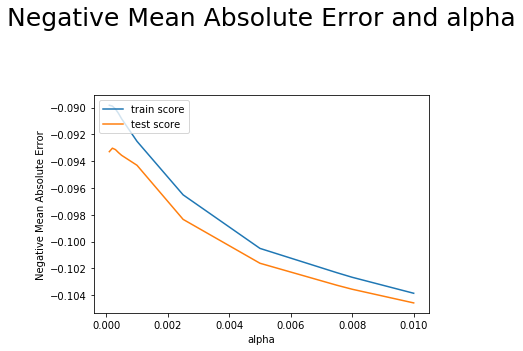

In [106]:
# plotting mean test and train scores with alpha 
cv_results_l['param_alpha'] = cv_results_l['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')

plt.show()



In [107]:
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)

{'alpha': 0.0002}
-0.09302525679261317


In [108]:
#From graph we can choose the best value of alpha is 0.0002
alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [109]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8883590371381751


In [110]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8772834787158874


In [111]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.020225225591178776


In [112]:
model_parameters_1 = list(lasso.coef_)
model_parameters_1.insert(0, lasso.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_1))

[('constant', 11.699),
 ('MSSubClass', -0.037),
 ('OverallQual', 0.087),
 ('OverallCond', 0.061),
 ('YearBuilt', -0.085),
 ('BsmtExposure', 0.033),
 ('GrLivArea', 0.138),
 ('BsmtFullBath', 0.038),
 ('FireplaceQu', 0.036),
 ('GarageCars', 0.048),
 ('GarageQual', 0.023),
 ('MSZoning_FV', 0.254),
 ('MSZoning_RH', 0.283),
 ('MSZoning_RL', 0.292),
 ('MSZoning_RM', 0.206),
 ('Neighborhood_ClearCr', 0.123),
 ('Neighborhood_Crawfor', 0.155),
 ('Neighborhood_Edwards', -0.082),
 ('Neighborhood_MeadowV', -0.062),
 ('Neighborhood_NoRidge', 0.097),
 ('Neighborhood_NridgHt', 0.146),
 ('Neighborhood_Others', 0.033),
 ('Neighborhood_Somerst', 0.12),
 ('Neighborhood_StoneBr', 0.118),
 ('Exterior1st_Others', -0.074),
 ('Exterior2nd_BrkFace', 0.113),
 ('Foundation_PConc', 0.048),
 ('Foundation_Stone', 0.029),
 ('Foundation_Wood', 0.0),
 ('GarageType_BuiltIn', -0.035),
 ('GarageType_NG', 0.103)]

In [113]:
lasso_coef = pd.DataFrame(list(zip(cols,model_parameters_1)))
lasso_coef.columns = ['Feature','Coef']

In [114]:
lasso_coef.sort_values(by='Coef',ascending=False).head(35)


,Feature,Coef
0,constant,11.699
13,MSZoning_RL,0.292
12,MSZoning_RH,0.283
11,MSZoning_FV,0.254
14,MSZoning_RM,0.206
16,Neighborhood_Crawfor,0.155
20,Neighborhood_NridgHt,0.146
6,GrLivArea,0.138
15,Neighborhood_ClearCr,0.123
22,Neighborhood_Somerst,0.120


##From lasso regression these are the variables significant in predicting the saleprice of the house.

'GrLivArea', 'Neighborhood_ClearCr','OverallQual','MSZoning_RL','Neighborhood_Somerst',
'Neighborhood_Crawfor', 'Neighborhood_NridgHt','OverallCond','Exterior2nd_BrkFace'
'GarageCars','BsmtFullBath','Neighborhood_NoRidge',
'Foundation_PConc','FireplaceQu','MSZoning_RH','Neighborhood_MeadowV'
'MSZoning_RM','GarageType_BuiltIn','Neighborhood_Edwards'

In [115]:
#From graph we can choose the best value of alpha is 0.0002,but for subjective questionwe doubled alpha value
alpha = 0.0004


lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0004, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [116]:
#lets predict the R-squared value of test and train data
y_train_pred_new2 = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_new2))

0.8853062847683073


In [117]:
#lets predict the R-squared value of test and train data
y_test_pred_new2 = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_new2))

0.8761253696908207


In [118]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred_new2))

RMSE is: 
 0.020416096519119496


In [119]:
model_parameters_2 = list(lasso.coef_)
model_parameters_2.insert(0, lasso.intercept_)
model_parameters_2 = [round(x, 3) for x in model_parameters_2]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_2))

[('constant', 11.831),
 ('MSSubClass', -0.035),
 ('OverallQual', 0.092),
 ('OverallCond', 0.062),
 ('YearBuilt', -0.086),
 ('BsmtExposure', 0.032),
 ('GrLivArea', 0.138),
 ('BsmtFullBath', 0.039),
 ('FireplaceQu', 0.036),
 ('GarageCars', 0.048),
 ('GarageQual', 0.009),
 ('MSZoning_FV', 0.123),
 ('MSZoning_RH', 0.143),
 ('MSZoning_RL', 0.167),
 ('MSZoning_RM', 0.075),
 ('Neighborhood_ClearCr', 0.113),
 ('Neighborhood_Crawfor', 0.142),
 ('Neighborhood_Edwards', -0.078),
 ('Neighborhood_MeadowV', -0.033),
 ('Neighborhood_NoRidge', 0.083),
 ('Neighborhood_NridgHt', 0.134),
 ('Neighborhood_Others', 0.018),
 ('Neighborhood_Somerst', 0.114),
 ('Neighborhood_StoneBr', 0.094),
 ('Exterior1st_Others', -0.041),
 ('Exterior2nd_BrkFace', 0.102),
 ('Foundation_PConc', 0.047),
 ('Foundation_Stone', 0.0),
 ('Foundation_Wood', 0.0),
 ('GarageType_BuiltIn', -0.032),
 ('GarageType_NG', 0.039)]

In [120]:
lasso_coef = pd.DataFrame(list(zip(cols,model_parameters_2)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(35)


,Feature,Coef
0,constant,11.831
13,MSZoning_RL,0.167
12,MSZoning_RH,0.143
16,Neighborhood_Crawfor,0.142
6,GrLivArea,0.138
20,Neighborhood_NridgHt,0.134
11,MSZoning_FV,0.123
22,Neighborhood_Somerst,0.114
15,Neighborhood_ClearCr,0.113
25,Exterior2nd_BrkFace,0.102


In [121]:
#From lasso regression these are the top 5 variables MSZoning_RL, MSZoning_RH, MSZoning_FV, MSZoning_RM and Neighborhood_Crawfor
#we are copying the data to another data frame
X_train_test=X_train
X_train_test.head()



,MSSubClass,OverallQual,OverallCond,YearBuilt,BsmtExposure,GrLivArea,BsmtFullBath,FireplaceQu,GarageCars,GarageQual,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Others,Neighborhood_Somerst,Neighborhood_StoneBr,Exterior1st_Others,Exterior2nd_BrkFace,Foundation_PConc,Foundation_Stone,Foundation_Wood,GarageType_BuiltIn,GarageType_NG
318,0.035305,0.648310,-0.532073,-0.715324,2.143653,2.121655,1.066863,0.658513,1.646935,0.268059,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
239,-0.195760,-0.066511,-1.448170,0.868511,-0.607084,-0.058599,-0.837450,1.206469,-1.034916,0.268059,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
986,-0.195760,-0.066511,2.216221,2.023391,-0.607084,0.219811,-0.837450,-0.985354,-1.034916,-1.121220,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1416,3.039142,-1.496155,0.384025,2.848305,-0.607084,1.451965,-0.837450,-0.985354,0.306009,0.268059,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
390,-0.195760,-0.781333,2.216221,2.353356,-0.607084,-0.284338,1.066863,-0.985354,-1.034916,0.268059,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Subjective Question 3:

In [122]:
X_train_test.drop(['MSZoning_RL','MSZoning_RH','MSZoning_FV','MSZoning_RM','Neighborhood_Crawfor'],axis=1,inplace=True)
X_train_test.columns

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtExposure',
       'GrLivArea', 'BsmtFullBath', 'FireplaceQu', 'GarageCars', 'GarageQual',
       'Neighborhood_ClearCr', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Others',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_Others',
       'Exterior2nd_BrkFace', 'Foundation_PConc', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_BuiltIn', 'GarageType_NG'],
      dtype='object')

In [123]:
X_test_test=X_test
X_test_test.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,BsmtExposure,GrLivArea,BsmtFullBath,FireplaceQu,GarageCars,GarageQual,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Others,Neighborhood_Somerst,Neighborhood_StoneBr,Exterior1st_Others,Exterior2nd_BrkFace,Foundation_PConc,Foundation_Stone,Foundation_Wood,GarageType_BuiltIn,GarageType_NG
1436,-0.888953,-1.496155,0.384025,0.010600,-0.607084,-1.230557,-0.837450,-0.985354,0.306009,0.268059,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
57,0.035305,0.648310,-0.532073,-1.078286,-0.607084,0.379709,-0.837450,-0.985354,0.306009,0.268059,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
780,-0.888953,0.648310,-0.532073,-0.781317,-0.607084,-0.498789,-0.837450,0.658513,0.306009,0.268059,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
382,0.035305,0.648310,-0.532073,-1.144279,1.226741,0.524557,-0.837450,-0.985354,0.306009,0.268059,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1170,0.497433,-0.066511,0.384025,-0.187379,1.226741,-0.752744,1.066863,-0.437399,-1.034916,0.268059,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
X_test_test.columns

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtExposure',
       'GrLivArea', 'BsmtFullBath', 'FireplaceQu', 'GarageCars', 'GarageQual',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Others', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Exterior1st_Others', 'Exterior2nd_BrkFace', 'Foundation_PConc',
       'Foundation_Stone', 'Foundation_Wood', 'GarageType_BuiltIn',
       'GarageType_NG'],
      dtype='object')

In [125]:
X_test_test.drop(['MSZoning_RL','MSZoning_RH','MSZoning_FV','MSZoning_RM','Neighborhood_Crawfor'],axis=1,inplace=True)
X_test_test.columns

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtExposure',
       'GrLivArea', 'BsmtFullBath', 'FireplaceQu', 'GarageCars', 'GarageQual',
       'Neighborhood_ClearCr', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Others',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_Others',
       'Exterior2nd_BrkFace', 'Foundation_PConc', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_BuiltIn', 'GarageType_NG'],
      dtype='object')

In [126]:
#Lasso regression
params = {'alpha': [0.0001, 0.0002,0.0003,0.0004,0.0005, 0.001,0.0025,0.005,0.0075, 0.008, 0.01]}
lasso = Lasso()

# cross validation
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train_test, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.0025, 0.005, 0.0075, 0.008, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [127]:
cv_results_l1 = pd.DataFrame(model_cv_l.cv_results_)
cv_results_l1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003590,7.977009e-04,0.000997,6.641573e-07,0.0001,{'alpha': 0.0001},-0.096851,-0.097288,-0.102601,-0.092778,-0.093375,-0.096579,0.003509,3,-0.095318,-0.092528,-0.091893,-0.096031,-0.096861,-0.094526,0.001963
1,0.002992,5.436780e-07,0.000798,3.990412e-04,0.0002,{'alpha': 0.0002},-0.096882,-0.097168,-0.102279,-0.092412,-0.093558,-0.096460,0.003445,1,-0.095371,-0.092626,-0.091945,-0.096135,-0.096864,-0.094588,0.001950
2,0.002792,3.987800e-04,0.000799,3.995223e-04,0.0003,{'alpha': 0.0003},-0.097012,-0.097084,-0.102103,-0.092620,-0.093833,-0.096531,0.003291,2,-0.095526,-0.092809,-0.092085,-0.096271,-0.096962,-0.094731,0.001933
3,0.002593,4.887724e-04,0.000399,4.886360e-04,0.0004,{'alpha': 0.0004},-0.097183,-0.097188,-0.101965,-0.092750,-0.094181,-0.096653,0.003166,4,-0.095721,-0.092973,-0.092308,-0.096400,-0.097134,-0.094907,0.001916
4,0.012369,1.975168e-02,0.001194,3.999447e-04,0.0005,{'alpha': 0.0005},-0.097379,-0.097368,-0.101956,-0.092779,-0.094436,-0.096784,0.003130,5,-0.095950,-0.093193,-0.092564,-0.096586,-0.097331,-0.095125,0.001896


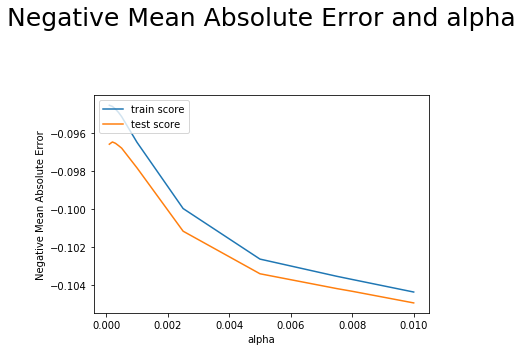

In [128]:
# plotting mean test and train scores with alpha 
cv_results_l1['param_alpha'] = cv_results_l1['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l1['param_alpha'], cv_results_l1['mean_train_score'])
plt.plot(cv_results_l1['param_alpha'], cv_results_l1['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')

plt.show()

In [129]:
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)

{'alpha': 0.0002}
-0.09645998954532338


In [130]:
#From graph we can choose the best value of alpha is 0.0002
alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_test, y_train)

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [131]:
#lets predict the R-squared value of test and train data
y_train_pred1 = lasso.predict(X_train_test)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred1))
y_test_pred_new3 = lasso.predict(X_test_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_new3))

0.8729362269738311
0.8688143510172208


In [132]:
model_parameters_3 = list(lasso.coef_)
model_parameters_3.insert(0, lasso.intercept_)
model_parameters_3 = [round(x, 3) for x in model_parameters_3]
cols = X_train_test.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_3))

[('constant', 11.986),
 ('MSSubClass', -0.044),
 ('OverallQual', 0.087),
 ('OverallCond', 0.065),
 ('YearBuilt', -0.1),
 ('BsmtExposure', 0.032),
 ('GrLivArea', 0.146),
 ('BsmtFullBath', 0.041),
 ('FireplaceQu', 0.043),
 ('GarageCars', 0.045),
 ('GarageQual', 0.019),
 ('Neighborhood_ClearCr', 0.128),
 ('Neighborhood_Edwards', -0.069),
 ('Neighborhood_MeadowV', -0.114),
 ('Neighborhood_NoRidge', 0.083),
 ('Neighborhood_NridgHt', 0.139),
 ('Neighborhood_Others', 0.034),
 ('Neighborhood_Somerst', 0.097),
 ('Neighborhood_StoneBr', 0.123),
 ('Exterior1st_Others', -0.042),
 ('Exterior2nd_BrkFace', 0.114),
 ('Foundation_PConc', 0.041),
 ('Foundation_Stone', 0.003),
 ('Foundation_Wood', 0.0),
 ('GarageType_BuiltIn', -0.037),
 ('GarageType_NG', 0.075)]

In [133]:
lasso_coef = pd.DataFrame(list(zip(cols,model_parameters_3)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(35)

,Feature,Coef
0,constant,11.986
6,GrLivArea,0.146
15,Neighborhood_NridgHt,0.139
11,Neighborhood_ClearCr,0.128
18,Neighborhood_StoneBr,0.123
20,Exterior2nd_BrkFace,0.114
17,Neighborhood_Somerst,0.097
2,OverallQual,0.087
14,Neighborhood_NoRidge,0.083
25,GarageType_NG,0.075


## Final Analysis & Recommendation

Best alpha value for Lasso : {'alpha': 0.002}

Best alpha value for Ridge : {'alpha': 2}

As per Ridge regression these are the variables significant in predicting the price of the house:

'MSZoning_RL','Neighborhood_ClearCr','MSZoning_RH','Neighborhood_Crawfor','GrLivArea','Neighborhood_NridgHt','Neighborhood_Somerst','Exterior2nd_BrkFace','OverallQual','YearBuilt','MSZoning_FV','Neighborhood_NoRidge','Neighborhood_Edwards','Neighborhood_StoneBr','Exterior1st_Others','OverallCond','MSZoning_RM','GarageCars',BsmtFullBath',
'GarageType_BuiltIn','Foundation_PConc','FireplaceQu','Foundation_Stone', 'Foundation_Wood, 'GarageType_NG','Neighborhood_Others', 'Neighborhood_MeadowV', 'MSSubClass',
GarageQual','BsmtExposure'



As per lasso regression these are the variables significant in predicting the saleprice of the house:

'GrLivArea', 'Neighborhood_ClearCr','OverallQual','MSZoning_RL','Neighborhood_Somerst',
'Neighborhood_Crawfor', 'Neighborhood_NridgHt','OverallCond','Exterior2nd_BrkFace'
'GarageCars','BsmtFullBath','Neighborhood_NoRidge',
'Foundation_PConc','FireplaceQu','MSZoning_RH','Neighborhood_MeadowV'
'MSZoning_RM','GarageType_BuiltIn','Neighborhood_Edwards'


These are the most important variables affecting the price of the house.

OverallCond
GrLivArea
MSZoning
Neighborhood
OverallQual
Exterior2nd
BsmtFullBath
Foundation
Fireplace
